# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [135]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
from sklearn.preprocessing import Imputer
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'


### Step 2: Read in your data set 

In [3]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [3]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

In [6]:
df_raw.shape

(400, 4)

Answer: 400

#### Question 2. Create a summary table

In [78]:
#function
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
admit,400.0,0.317500,0.466087,0.00,0.00,0.000,1.00,1.0
gre,398.0,588.040201,115.628513,220.00,520.00,580.000,660.00,800.0
gpa,398.0,3.390930,0.380630,2.26,3.13,3.395,3.67,4.0
prestige,399.0,2.486216,0.945333,1.00,2.00,2.000,3.00,4.0


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: 
1) GRE is a range of scores with a bigger numbers than GPA which is 0.0 -4.0 scales.  
2) GRE min and max score have a high distance from the mean.  This suggests outliner.

#### Question 4. Drop data points with missing data


In [13]:
#Locate the null values
df_raw[df_raw.isnull().any(axis=1)]

,admit,gre,gpa,prestige
187,0,NaN,NaN,2.0
212,0,NaN,2.87,2.0
236,1,660.0,NaN,NaN


In [79]:
df_clean =df_raw.dropna(axis=0)

In [15]:
df_clean.isnull().sum()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [16]:
df_clean.isnull().sum()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

In [17]:
(df_clean == np.nan).sum()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

In [86]:
df_clean.loc[[187,212,236]]

KeyError: 'None of [[187, 212, 236]] are in the [index]'

Answer: Count all the null values are 0 and null values are no longer found.

#### Question 6. Create box plots for GRE and GPA

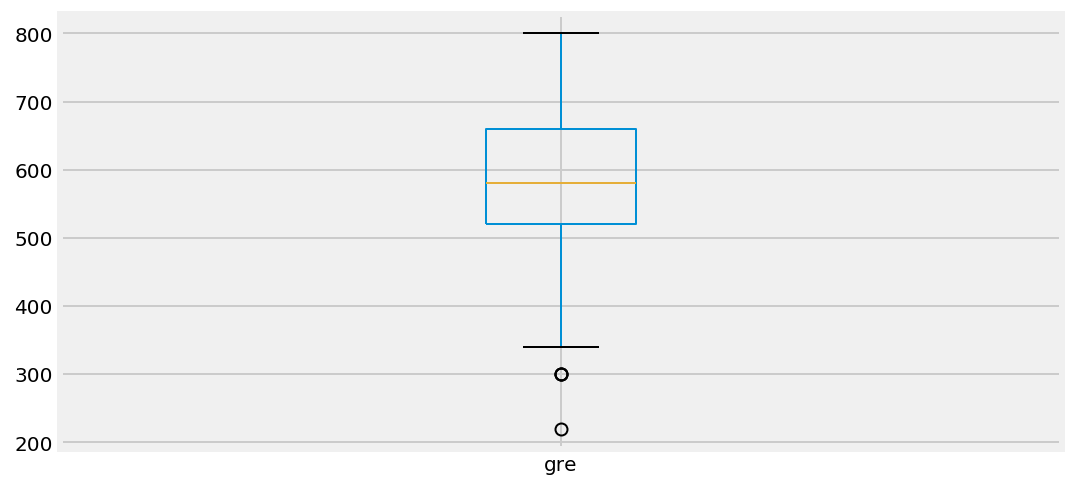

In [18]:
#boxplot 1
df_clean.gre.plot(kind = 'box', figsize = (8, 4))

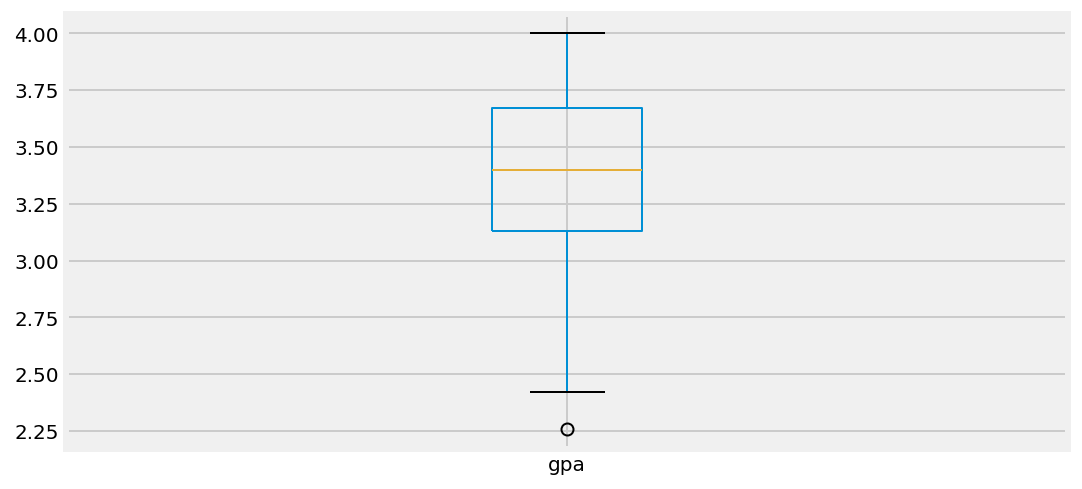

In [19]:
#boxplot 2 
df_clean.gpa.plot(kind = 'box', figsize = (8, 4))

#### Question 7. What do this plots show?

Answer: It shows distribution of data, maximum, median, minimum values and ouitliners. In the GRE blox plot, we can see the ouliner of 200 and in GPA, the outliner of 2.25.  This will skew the mean values.

In [129]:
Q1 = df_clean.quantile(0.25)
Q3 = df_clean.quantile(0.75)

IQR = Q3 - Q1

IQR

admit         1.00
gre         140.00
gpa           0.54
prestige      1.00
dtype: float64

#### Question 8. Describe each distribution 

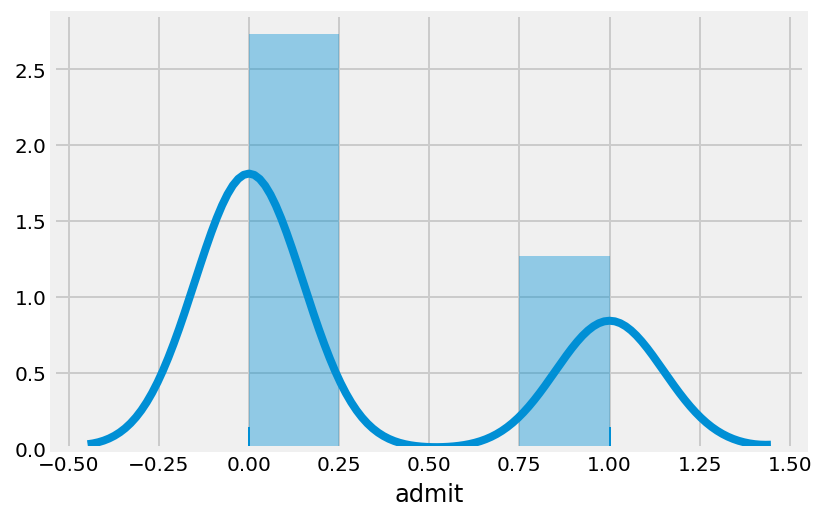

In [131]:
sns.distplot(df_clean.admit, rug=True)

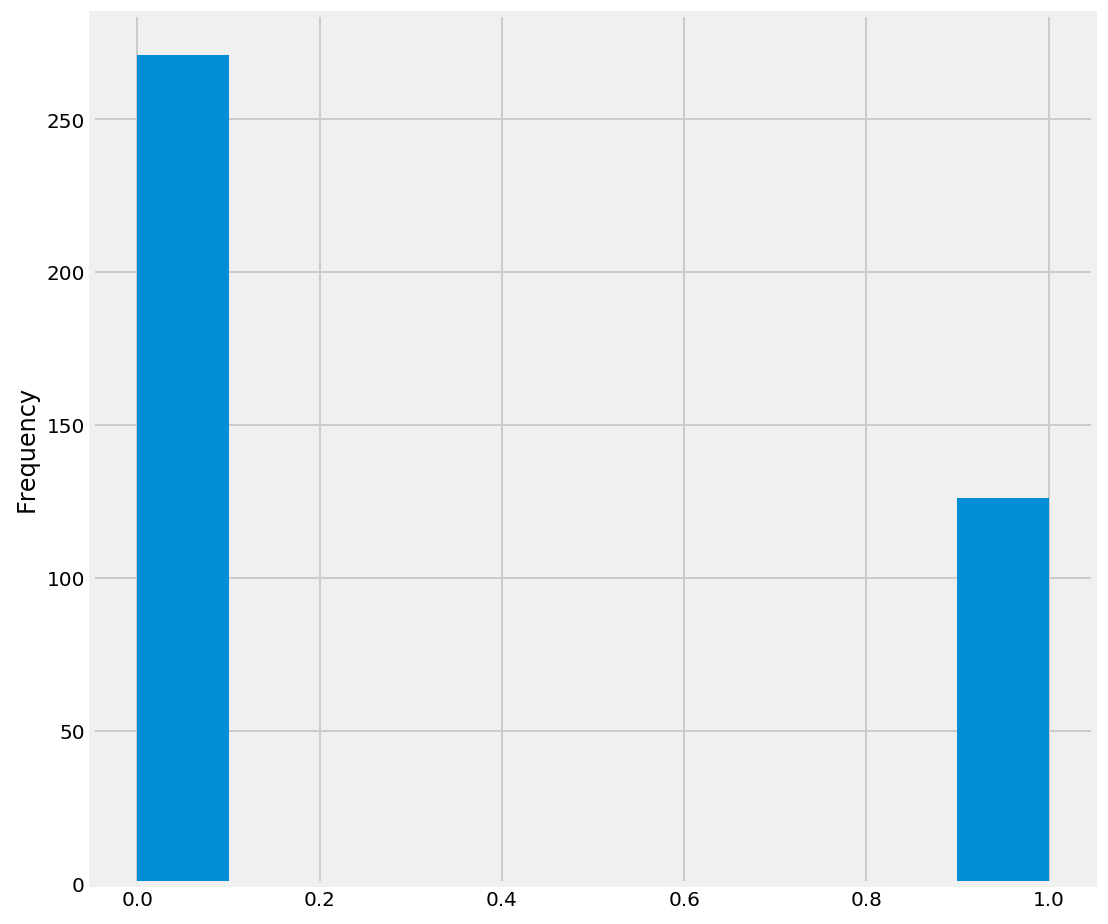

In [26]:
# plot the distribution of each variable 
df_clean.admit.plot(kind = 'hist', figsize = (8, 8))

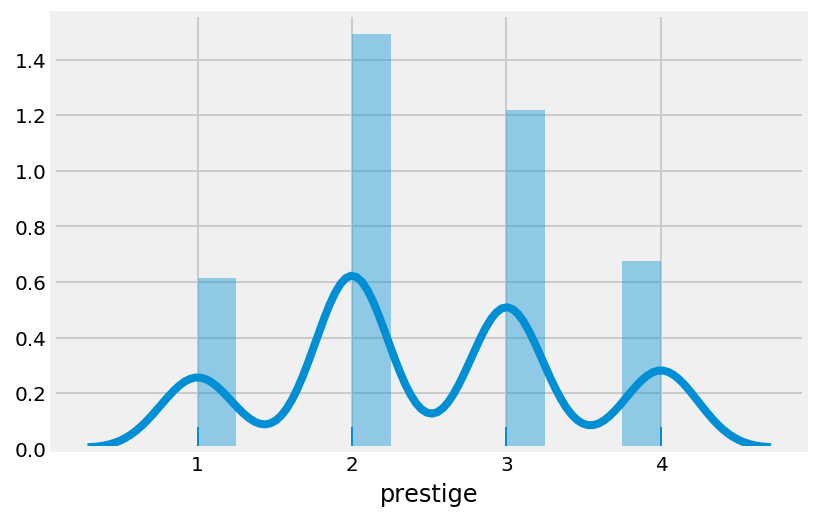

In [132]:
sns.distplot(df_clean.prestige, rug=True)

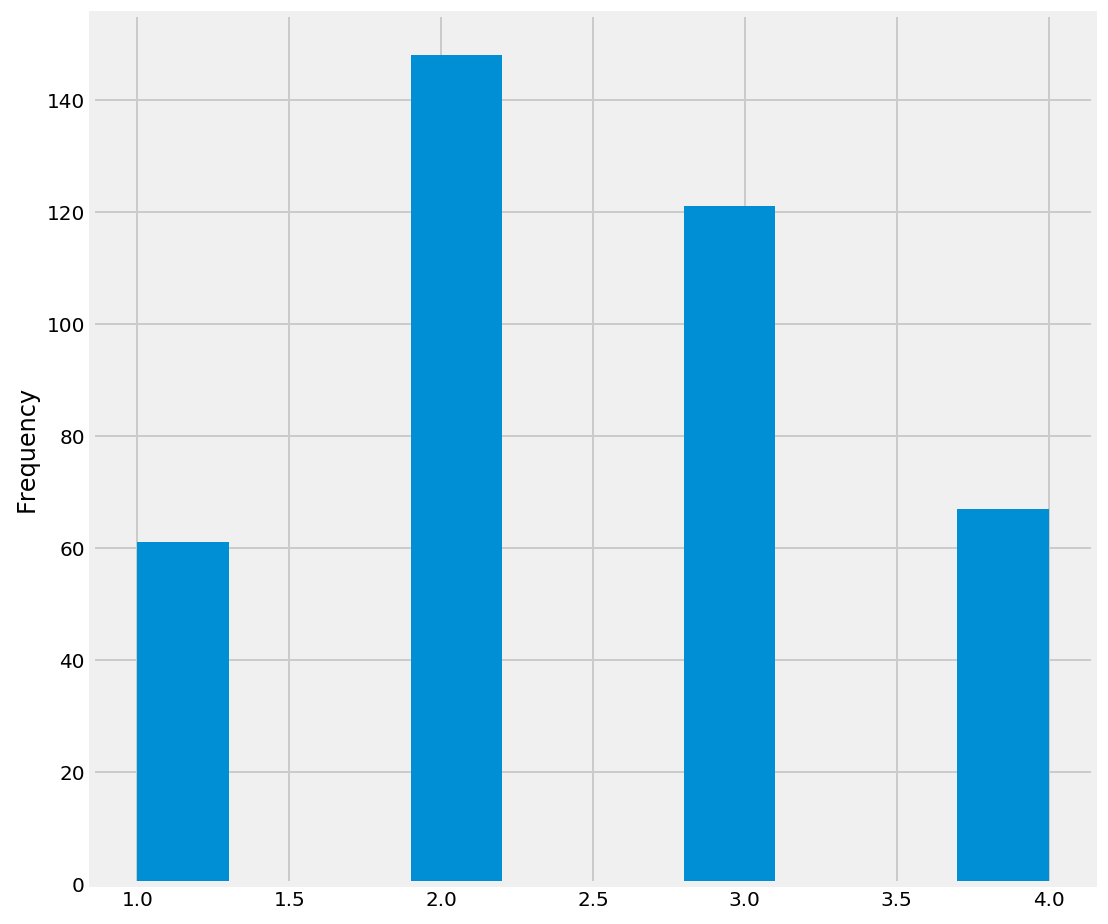

In [27]:
df_clean.prestige.plot(kind = 'hist', figsize = (8, 8))

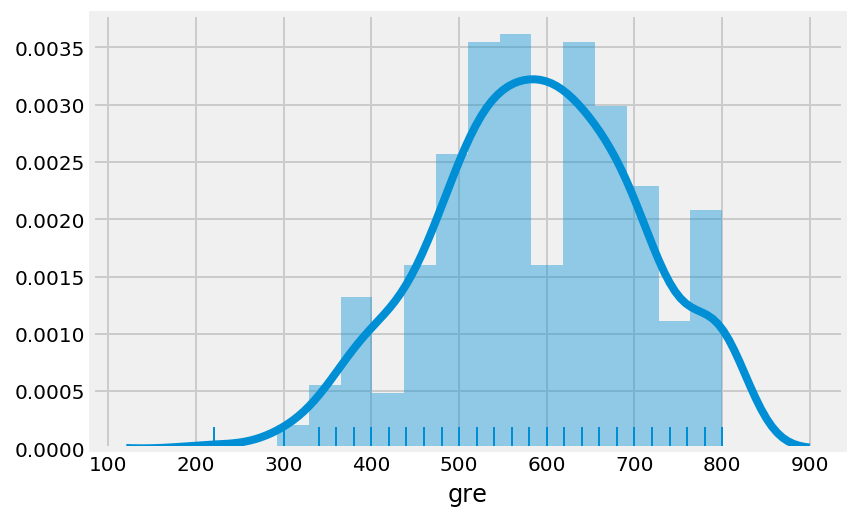

In [133]:
sns.distplot(df_clean.gre, rug=True)

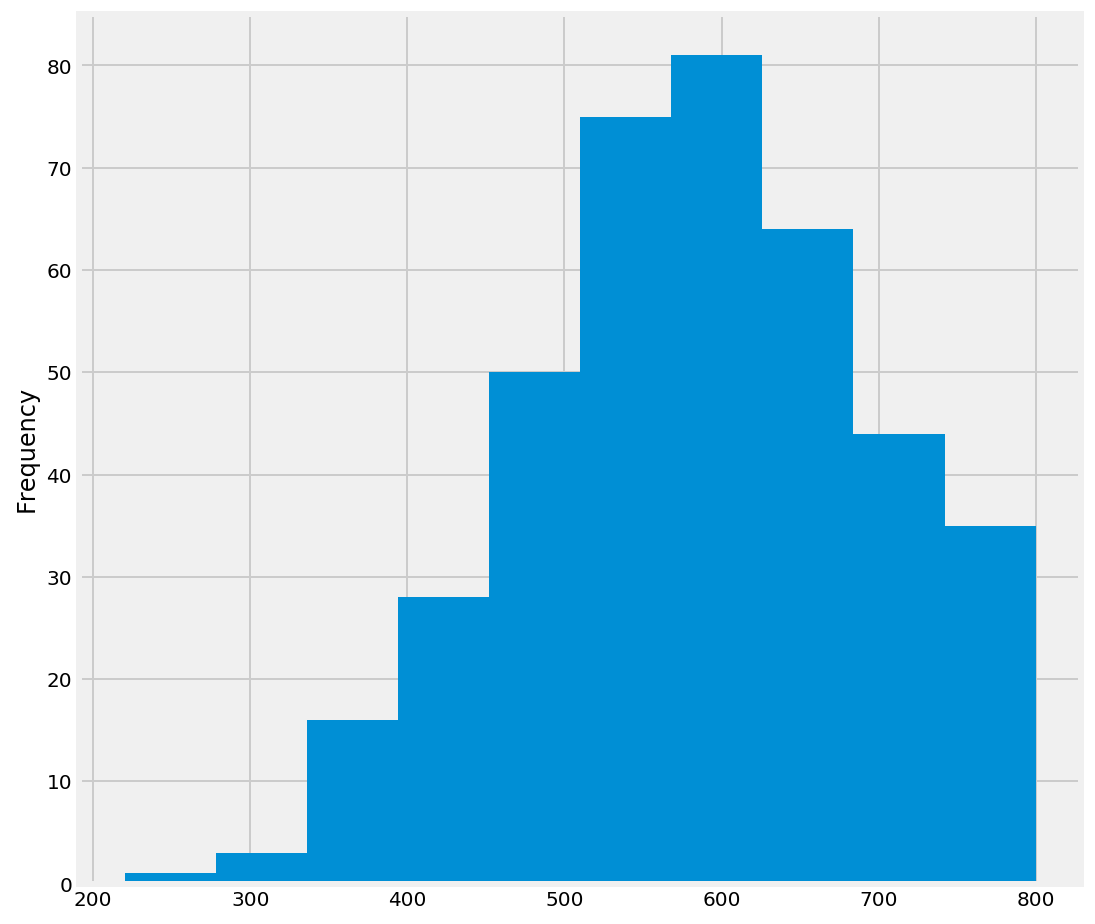

In [28]:
df_clean.gre.plot(kind = 'hist', figsize = (8, 8))

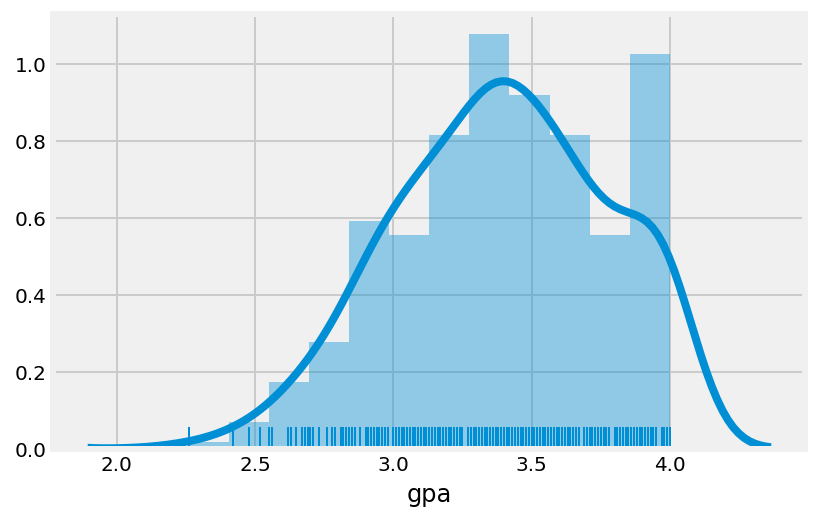

In [134]:
sns.distplot(df_clean.gpa,rug=True)

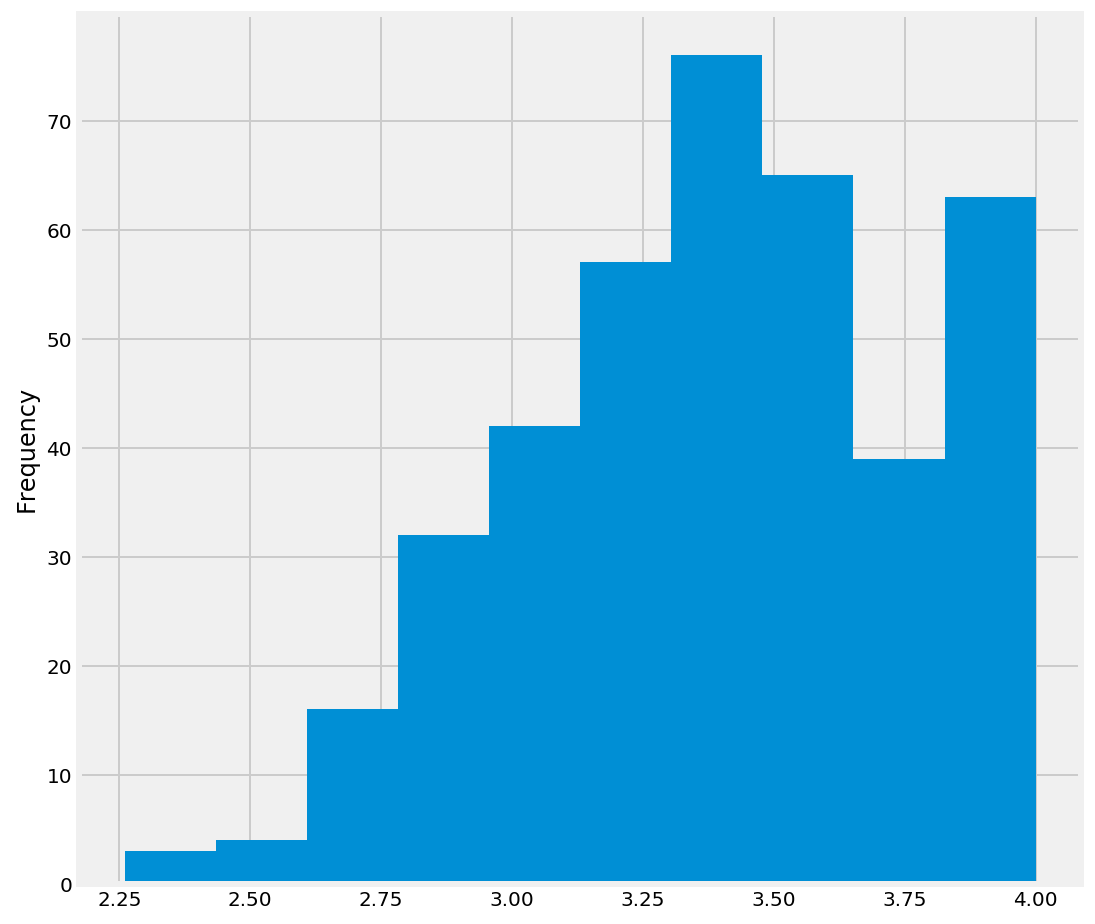

In [29]:
df_clean.gpa.plot(kind = 'hist', figsize = (8, 8))

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: No, as we have outliners. 


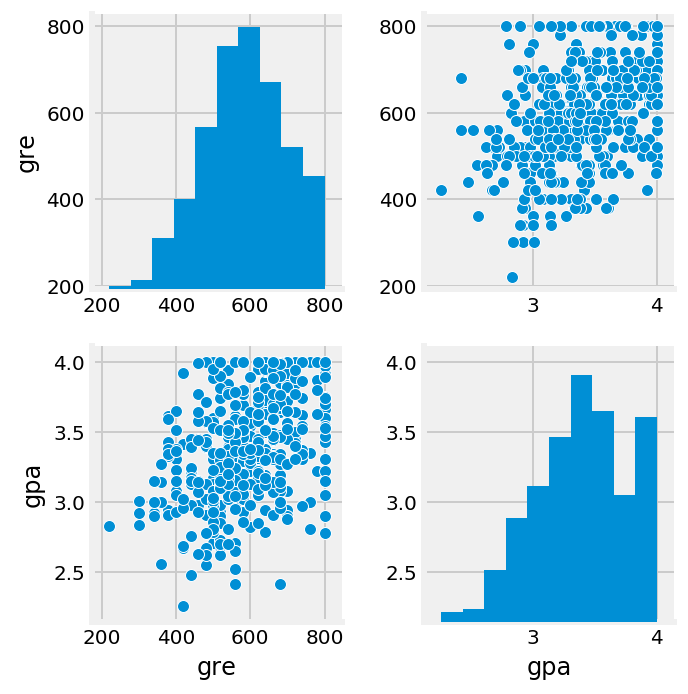

In [31]:
sns.pairplot(df_clean[['gre', 'gpa']].dropna())

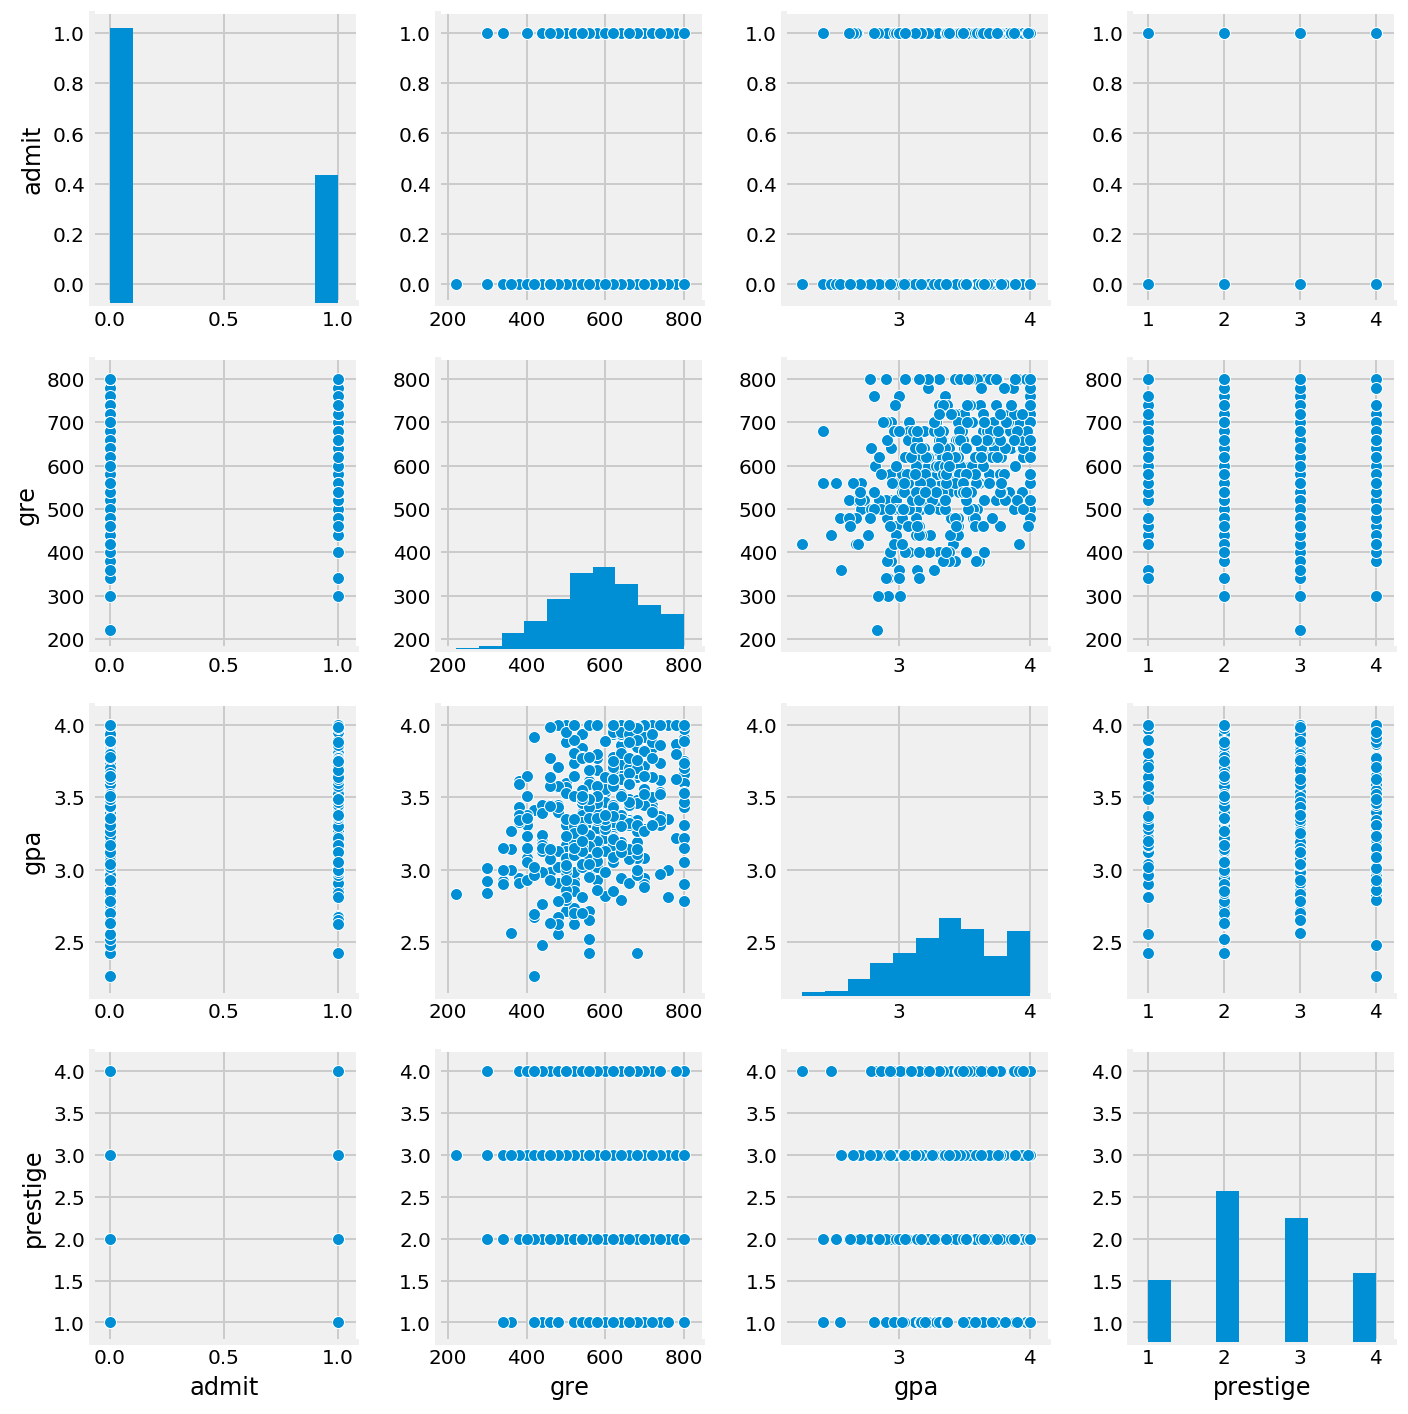

In [32]:
sns.pairplot(df_clean.dropna())

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: In general, we could consider remove outliner.  But from plotting scatter plot, we found some people with lower gpa score have a high GRE of 700.  Therefore, I would not recommend removing the outliners.

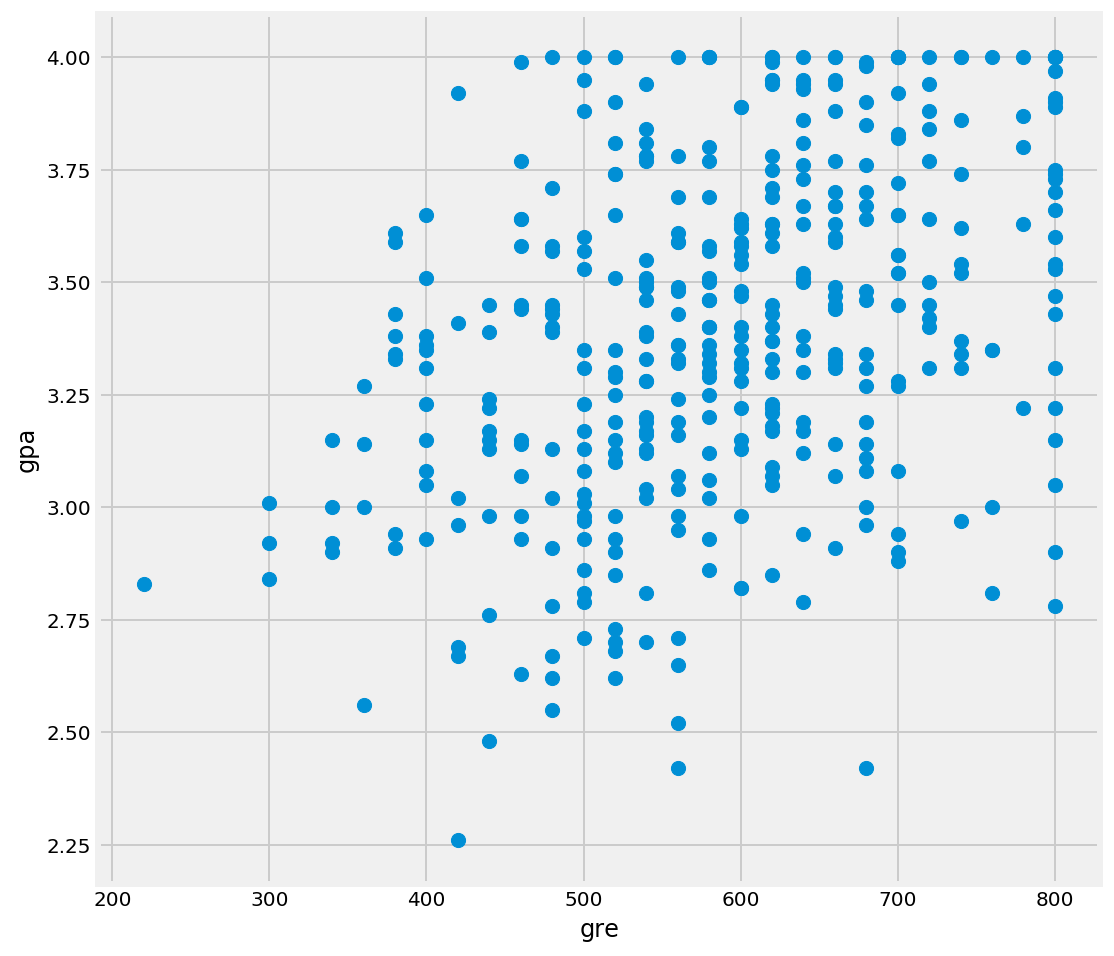

In [87]:
df_clean.plot(kind = 'scatter', x = 'gre', y = 'gpa', s = 50, figsize = (8, 8))

#### Question 11. Which of our variables are potentially colinear? 

In [33]:
# create a correlation matrix for the data
df_raw.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


GPA and GRE is highly correlated, Prestige and admit has negative correlation.

In [34]:
corr=df_raw.corr()

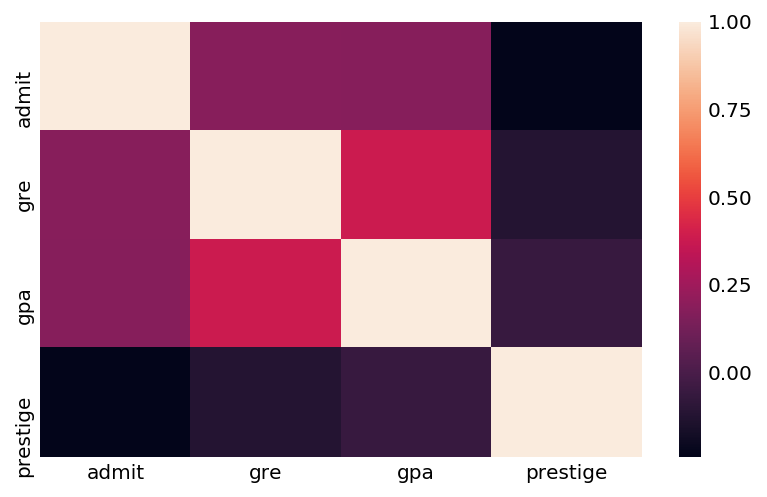

In [35]:
sns.heatmap(corr)

#### Question 12. What did you find?

Answer: GPA & GRE has a higest correlation. Admission and prestige has a negative correlation.  When the prestige number goes up (4), the admission goes down (0).


#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

There is difference in admission rate based on the prestige of the school.

In [122]:
df_clean.groupby(["admit","prestige"]).size()

admit  prestige
0      1.0         28
       2.0         95
       3.0         93
       4.0         55
1      1.0         33
       2.0         53
       3.0         28
       4.0         12
dtype: int64

### I use A/B Test split to explore the association between admissions rates and pretige of undergrad school.  I used the admit and reject result of pretige = 1 (for the highest ranking school) and prestige = 4 for the lowest ranking school as my A/B test.

In [99]:
Admit_1 =33
Reject_1 =28
Admit_4 =12
Reject_4 =55

In [100]:
table = np.array([[Admit_1, Reject_1],
                  [Admit_4, Reject_4]])

results = stats.chi2_contingency(table)
chi2 = results[0]
pvalue = results[1]
print chi2, pvalue

16.7891073306 4.17723974693e-05


In [101]:

A_rate = float(Admit_1)/(Admit_1+Reject_1)
B_rate = float(Admit_4)/(Admit_4+Reject_4)
A_vs_B = A_rate - B_rate
print A_rate, B_rate
print A_vs_B
print A_rate/B_rate

0.540983606557 0.179104477612
0.361879128945
3.02049180328


Answer: There is 54% chance of being admit if you are in prestige school vs. 17% chance if you are in least prestige school.  There are  3 times more chance of being admit if you are in prestige school.

In [125]:
#Combining Prestige 1+2 vs. Prestige 3_4, still yields the similar results.
Admit_1 =33+53
Reject_1 =28+95
Admit_4 =12+28
Reject_4 =55+93

In [126]:
A_rate = float(Admit_1)/(Admit_1+Reject_1)
B_rate = float(Admit_4)/(Admit_4+Reject_4)
A_vs_B = A_rate - B_rate
print A_rate, B_rate
print A_vs_B
print A_rate/B_rate

0.411483253589 0.212765957447
0.198717296142
1.93397129187


In [127]:
table = np.array([[Admit_1, Reject_1],
                  [Admit_4, Reject_4]])

results = stats.chi2_contingency(table)
chi2 = results[0]
pvalue = results[1]
print chi2, pvalue

17.1340006146 3.48331182518e-05


#### Question 14. What is your hypothesis? 

Answer: The prestige of school has an impact on admission rate.  However, the p value of greater than one suggests that the test result is not significant and we need more data.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

In [165]:
##fill missingvalue with 0
df_newraw = df_raw

df_newraw[df_newraw.isnull().any(axis=1)]

,admit,gre,gpa,prestige
187,0,NaN,NaN,2.0
212,0,NaN,2.87,2.0
236,1,660.0,NaN,NaN


In [168]:
df_newraw1= df_newraw.fillna(0)

In [169]:
df_newraw1.isnull().sum()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

#### 2. Bonus: Log transform the skewed data

In [181]:
df_raw.skew()

admit       0.787051
gre        -0.150127
gpa        -0.211765
prestige    0.093663
dtype: float64

In [182]:
df_newraw1.skew()

admit       0.787051
gre        -0.609082
gpa        -2.186092
prestige    0.066248
dtype: float64

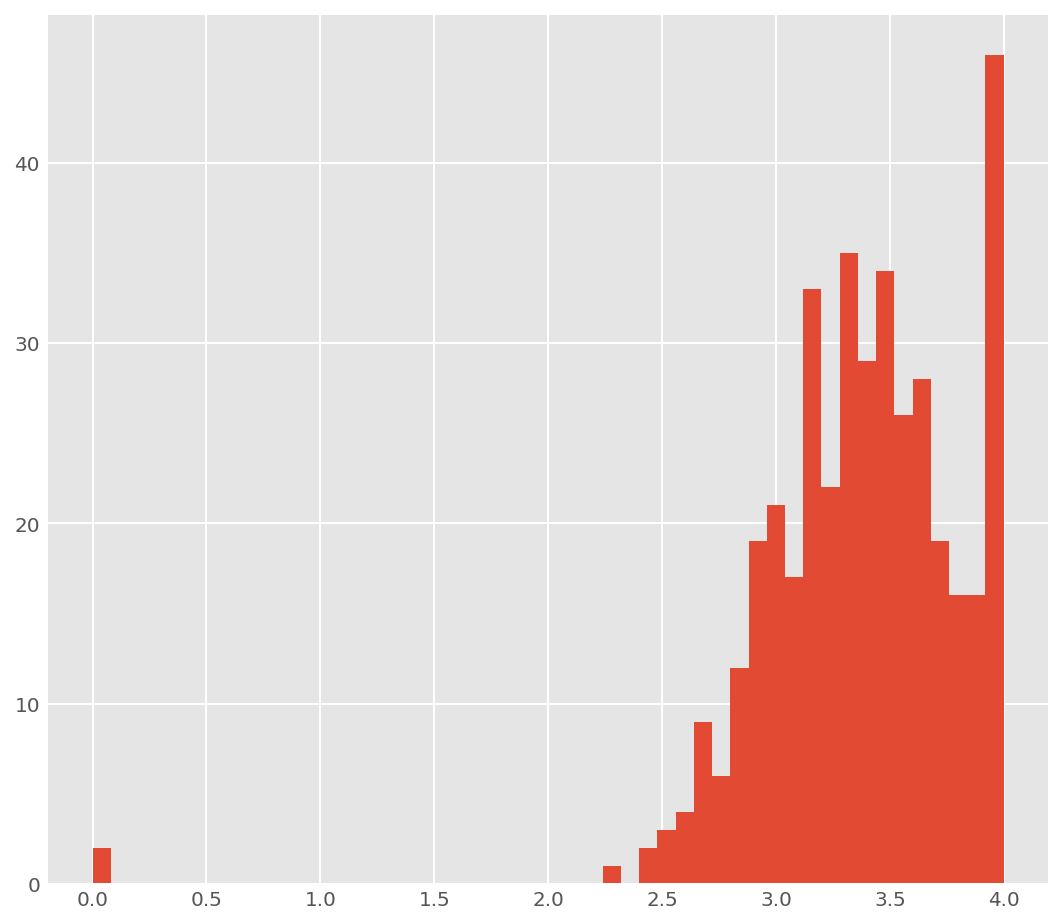

In [185]:
df_newraw1.gpa.hist(figsize = (8,8),          # Plot histogram
                 bins=50)    

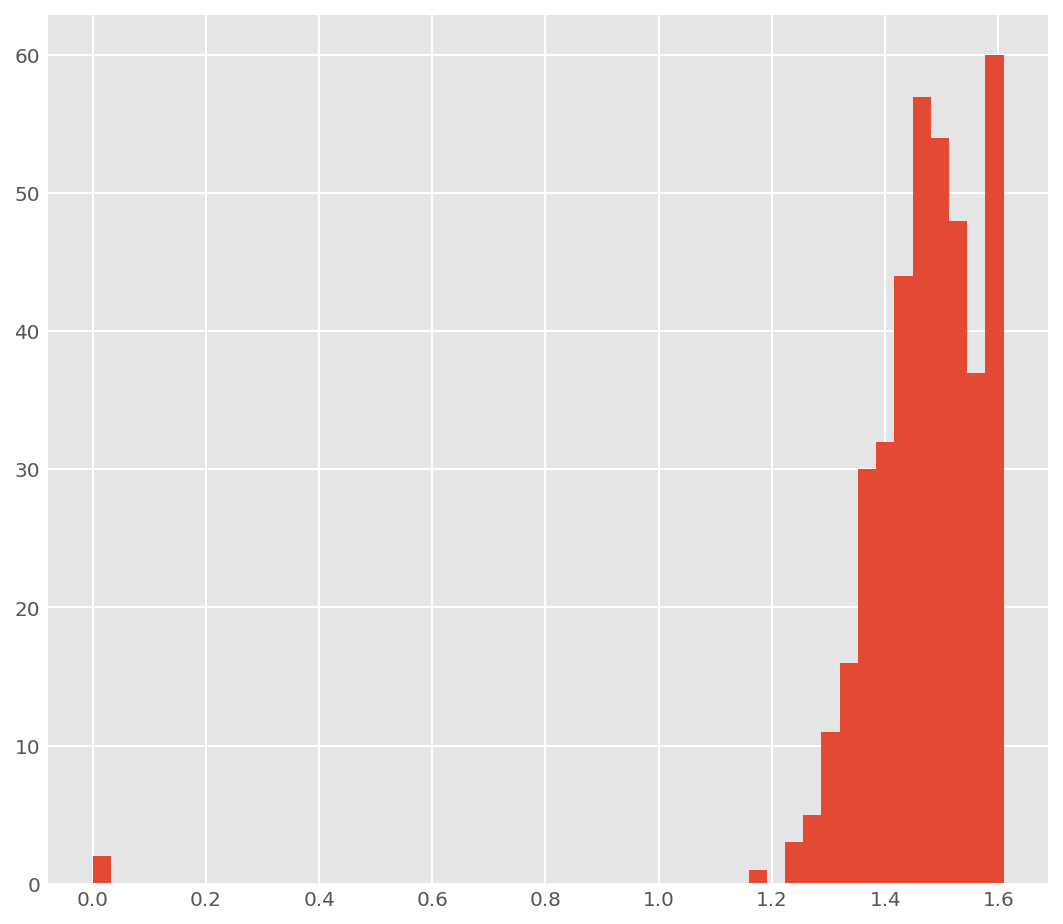

In [186]:
log_transformed = (df_newraw1.gpa+1).apply(np.log)   # Get the log of the data

log_transformed.hist(figsize = (8,8),          # Plot histogram
                 bins=50)    

#### 3. Advanced: Impute missing data

In [187]:

imp = Imputer(missing_values='NaN',  # Create imputation model
              strategy='mean',       # Use mean imputation
              axis=0)                # Impute by column

imputed_df = imp.fit_transform(df_raw)   # Use imputation model to get values

imputed_df = pd.DataFrame(imputed_df,  # Remake DataFrame with new values
                           df_raw.index,
                           columns = df_raw.columns)



In [137]:
imputed_df.loc[[187,212,236]]

,admit,gre,gpa,prestige
187,0.0,588.040201,3.39093,2.000000
212,0.0,588.040201,2.87000,2.000000
236,1.0,660.000000,3.39093,2.486216
